<a href="https://colab.research.google.com/github/futureCodersSE/python-programming-for-data/blob/main/Worksheets/Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i  This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

In [4]:
import pandas as pd

air_df1 = pd.read_csv('https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i', skiprows=1)
air_df1.info() #At first glance there appears to be no missing data
air_df1['Nitrogen dioxide'].min() #Shows a figure
air_df1['Nitrogen dioxide'].max() #Shows a string 'nodata'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


'nodata'

In [5]:
air_df1['Date'] = pd.to_datetime(air_df1['Date'], dayfirst=True)
air_df1

,Date,Time,Nitrogen dioxide,Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.9604,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³
3,2020-01-01,4:00,35.85312,V µg/m³
4,2020-01-01,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,2020-12-31,20:00,24.4694,V µg/m³
8780,2020-12-31,21:00,22.62313,V µg/m³
8781,2020-12-31,22:00,20.3186,V µg/m³
8782,2020-12-31,23:00,21.47177,V µg/m³


In [6]:
import numpy as np
#Values in 'Nitrogen dioxide' currently in string format and unable to 
#convert to float due to 'nodata', this needs changed to NaN to convert
#to a float using .astype
air_df1['Nitrogen dioxide'] = air_df1['Nitrogen dioxide'].replace('nodata', np.nan)
#Can now convert to float 
air_df1['Nitrogen dioxide'] = air_df1['Nitrogen dioxide'].astype(float)
#Dropping missing values from Nitrogen as the rows contain no other 
#useful data if this is missing. Chosen to alter the table rather than
#make another copy
air_df1.dropna(subset = ['Nitrogen dioxide'], inplace=True)
#Can now see that the rows have been removed
air_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8632 non-null   datetime64[ns]
 1   Time              8632 non-null   object        
 2   Nitrogen dioxide  8632 non-null   float64       
 3   Status            8632 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 337.2+ KB


In [7]:
#Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)
air_df1 = air_df1.rename(columns = {'Nitrogen dioxide':'NO2 Level (V ug/m2)'})
air_df1.head()

,Date,Time,NO2 Level (V ug/m2),Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.96040,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³
3,2020-01-01,4:00,35.85312,V µg/m³
4,2020-01-01,5:00,32.10503,V µg/m³


In [8]:
air_df1.sort_values(by='NO2 Level (V ug/m2)', inplace=True)

In [9]:
#Create a new column for 'Weekdays' (use df['Date'].dt.weekday)
air_df1['Weekdays'] = air_df1['Date'].dt.weekday


In [10]:
#Removing the column "Status" and all the values within it
air_df1 = air_df1.drop('Status', axis=1)

In [11]:
air_df1.head()

,Date,Time,NO2 Level (V ug/m2),Weekdays
8668,2020-12-27,5:00,0.42410,6
5712,2020-08-26,1:00,0.58689,2
4489,2020-07-06,2:00,0.58930,0
5714,2020-08-26,3:00,0.59123,2
8669,2020-12-27,6:00,0.65300,6


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [12]:
air_df2 = pd.read_csv('NO2-measured-data-2021-2022-Chatham-Roadside.csv', skiprows=1)


air_df2['Date'] = pd.to_datetime(air_df2['Date'], dayfirst=True)
air_df2.info()
air_df2['Nitrogen dioxide'].min()
air_df2['Nitrogen dioxide'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Time              8760 non-null   object        
 2   Nitrogen dioxide  8760 non-null   object        
 3   Status            8760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 273.9+ KB


'nodata'

In [13]:
air_df2['Nitrogen dioxide'] = air_df2['Nitrogen dioxide'].replace('nodata', np.nan)
#Can now convert to float 
air_df2['Nitrogen dioxide'] = air_df2['Nitrogen dioxide'].astype(float)
air_df2.dropna(subset='Nitrogen dioxide', inplace=True)
air_df2 = air_df2.rename(columns = {'Nitrogen dioxide':'NO2 Level (V ug/m2)'})

In [14]:
air_df2['Weekdays'] = air_df2['Date'].dt.weekday


In [15]:
air_df2 = air_df2.drop('Status', axis=1)

In [16]:
air_df2.sort_values(by='NO2 Level (V ug/m2)', inplace=True)

air_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8680 entries, 7177 to 7983
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8680 non-null   datetime64[ns]
 1   Time                 8680 non-null   object        
 2   NO2 Level (V ug/m2)  8680 non-null   float64       
 3   Weekdays             8680 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 339.1+ KB


In [25]:
data = [air_df1, air_df2]
comb_df = pd.concat(data, join='inner')
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17312 entries, 8668 to 7983
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 17312 non-null  datetime64[ns]
 1   Time                 17312 non-null  object        
 2   NO2 Level (V ug/m2)  17312 non-null  float64       
 3   Weekdays             17312 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 676.2+ KB


In [18]:
comb_df.groupby('Weekdays')[['NO2 Level (V ug/m2)']].describe()
#NO2 levels are higher Mon-Fri (0-4), which suggests people are 
#possibly commuting to/from work in this area 

NO2 Level (V ug/m2)                                            \
                       count       mean        std      min        25%   
Weekdays                                                                 
0                     2452.0  19.019897  13.566948  0.58930   8.944637   
1                     2434.0  19.862832  13.623132 -0.10519   9.677307   
2                     2485.0  21.569402  13.843067 -0.77743  10.894910   
3                     2483.0  19.822405  12.873919 -0.13101  10.190015   
4                     2500.0  20.776520  13.236096  0.03299  10.690697   
5                     2494.0  15.905960  10.595521  0.75690   8.021902   
6                     2464.0  13.160879   8.851133 -0.41740   6.782293   

                                          
               50%        75%        max  
Weekdays                                  
0         15.91839  26.016740  113.06189  
1         16.66992  27.045835   92.13063  
2         18.47115  30.186290   84.55297  
3         16.82392  26.306000   72.00084  
4         18.00050  28.146380   76.72297  
5         13.60438  20.842495   74.93681  
6         11.11951  16.998405   58.31275

In [19]:
comb_df.groupby('Time')[['NO2 Level (V ug/m2)']].describe()
comb_df['Time'].nunique() #original answer was 34
#I wanted to see if 07:00-09:00 was particularly busy but can see there
#is duplicate times, have fixed this in code below and ran the concat function again to merge dup's

34

In [22]:
air_df1['Time'].unique()

air_df1['Time'] = air_df1['Time'].replace('24:00:00', '00:00')
air_df1['Time'] = air_df1['Time'].replace('1:00', '01:00')
air_df1['Time'] = air_df1['Time'].replace('2:00', '02:00')
air_df1['Time'] = air_df1['Time'].replace('3:00', '03:00')
air_df1['Time'] = air_df1['Time'].replace('4:00', '04:00')
air_df1['Time'] = air_df1['Time'].replace('5:00', '05:00')
air_df1['Time'] = air_df1['Time'].replace('6:00', '06:00')
air_df1['Time'] = air_df1['Time'].replace('7:00', '07:00')
air_df1['Time'] = air_df1['Time'].replace('8:00', '08:00')
air_df1['Time'] = air_df1['Time'].replace('9:00', '09:00')
pd.to_datetime(air_df1['Time'], format='%H:%M').dt.hour
air_df1['Time']
air_df1['Time'].unique() #formatted to match air_df2
air_df1['Time'].nunique() #should show 24, which it does

24

In [23]:
air_df2['Time'].unique()
air_df2['Time'] = air_df2['Time'].replace('24:00', '00:00')
pd.to_datetime(air_df2['Time'], format='%H:%M').dt.hour
air_df2['Time'].unique()

array(['02:00', '04:00', '03:00', '00:00', '05:00', '01:00', '06:00',
       '23:00', '07:00', '09:00', '10:00', '08:00', '22:00', '13:00',
       '17:00', '15:00', '21:00', '16:00', '11:00', '19:00', '18:00',
       '20:00', '14:00', '12:00'], dtype=object)

In [26]:
comb_df['Time'].nunique() #Duplicated times formatted and tables successfully merged

24

In [27]:
comb_df.groupby(['Time'])[['NO2 Level (V ug/m2)']].describe()
#NO2 level rises between 07:00-10:00 & 15:00 - 19:00, peak commuting times

NO2 Level (V ug/m2)                                            \
                    count       mean        std      min        25%   
Time                                                                  
00:00               725.0  12.664046  10.037105 -0.10519   6.065970   
01:00               721.0  11.294774   9.330487  0.08798   5.278500   
02:00               719.0   9.925523   8.521998 -0.77743   4.443320   
03:00               718.0   9.435420   8.014477 -0.31174   4.145580   
04:00               722.0   9.441104   7.970945 -0.41740   4.338633   
05:00               722.0  11.250537   8.177716  0.05020   5.422325   
06:00               724.0  15.470032   9.691751  0.65300   7.971795   
07:00               723.0  21.008872  12.101983  0.78148  11.429410   
08:00               722.0  24.391491  14.057130  1.72125  12.986137   
09:00               711.0  23.582872  13.954909  1.33875  12.674050   
10:00               709.0  21.246499  11.628885  1.53000  12.502820   
11:00               709.0  20.476293  10.876772  3.06000  12.608900   
12:00               719.0  20.141642  10.238479  3.45385  12.505065   
13:00               720.0  20.139014  10.256934  2.83767  12.867330   
14:00               719.0  21.451690  11.506096  3.50148  12.982670   
15:00               722.0  23.494848  13.519311  2.94716  13.560147   
16:00               725.0  24.189881  14.402212  3.01840  13.544540   
17:00               726.0  23.927444  13.771491  2.83911  13.811233   
18:00               726.0  24.501481  14.251048  3.54849  13.516402   
19:00               726.0  24.043589  14.423110  3.28723  13.055013   
20:00               726.0  22.222759  13.363951  3.55940  12.060550   
21:00               726.0  19.693327  12.464720  3.00055  10.708665   
22:00               726.0  17.283906  11.856083  2.11331   8.650892   
23:00               726.0  14.897435  10.978291  1.22356   7.144617   

                                        
             50%        75%        max  
Time                                    
00:00   9.462020  15.426080   64.73274  
01:00   8.402900  13.744500   61.17953  
02:00   7.212990  12.359600   60.34039  
03:00   7.033675  11.727495   62.11923  
04:00   7.028890  12.184815   61.36253  
05:00   9.094040  14.179920   57.40897  
06:00  13.457115  20.202983   72.66929  
07:00  19.034270  28.963910   71.49768  
08:00  22.213645  34.299543   67.05851  
09:00  20.976840  30.547875   80.27844  
10:00  18.983860  27.615870   70.98859  
11:00  18.168750  26.158290   72.71344  
12:00  18.164920  25.461920   70.56309  
13:00  17.762100  25.271902   73.61957  
14:00  19.077520  27.041730   72.05277  
15:00  20.356395  31.058718  113.06189  
16:00  20.781040  31.513180   84.86896  
17:00  20.974625  31.131480   87.10202  
18:00  21.203530  32.339932   92.13063  
19:00  20.261920  31.666255   76.72297  
20:00  18.884985  28.878325   74.93681  
21:00  16.649255  24.664062   72.78984  
22:00  14.154060  21.939555   68.39703  
23:00  11.467690  18.578080   63.42975

/var/folders/mk/bg1pl0ld3zl9yc1r_dm1vmbc0000gn/T/ipykernel_16958/1112980901.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekdays = comb_df.groupby(['Weekdays']).mean()


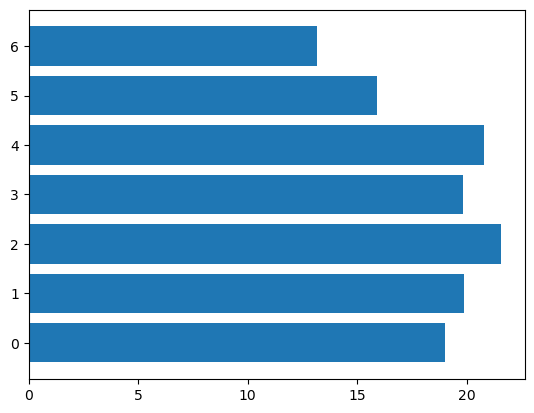

In [32]:
import matplotlib.pyplot as plt

weekdays = comb_df.groupby(['Weekdays']).mean()
visual_df = weekdays['NO2 Level (V ug/m2)']
visual_df
labels = visual_df.keys()
labels

plt.barh(labels, visual_df)
plt.show()

In [ ]:
#This bar graph shows that NO2 levels are highest Monday - Friday (0-4), 
#which suggests the road this data was obtained from is used by 
#commuters. In the code above I checked to see whether this also
#reasonated with timings, which it did. Peak travel times were 0700 -
#1000 and 1500 - 1900hrs

In [ ]:
#Through completing this project I have learned how to filter data, merge
#data sets and clean the data. I learned how to replace values within the time
#column so that when the tables merged together there were no duplicate
#times which made it easier to interpret the data. I used matplot to create
#the bar chart which was new to me. I had very basic knowledge of Python and none
#of pandas prior to this course and now feel more confident utilising these
#programmes for data.

### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
